In [2]:
import librosa.display
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import csv
import os
import numpy as np 
import torch
import torch.nn as nn
import torch.nn.functional as F
import glob
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import random



In [ ]:
# helper functions



In [125]:
# audiofiles = glob.glob('data/MDB-stem-synth/audio_stems/*')
# csvfiles = glob.glob('data/MDB-stem-synth/annotation_stems/*')

# frame_n = 27
# audio_name = audiofiles[11]
# print(audio_name)
# audio_file, sr= librosa.load(audio_name)

# start_frame = (frame_n*64) - 64//2
# end_model_sample = start_frame + 16 * 64
# pitch_frame0f = np.arange(start_frame, end_model_sample) 

# pitch_data_frame0f = audio_file[start_frame:end_model_sample] 
# #librosa.display.waveplot(audio_file, sr=sr)
# plt.plot(pitch_frame0f, pitch_data_frame0f)
# print((end_model_sample))

In [124]:
# filename = os.path.basename(csvfiles[12]).rstrip('.csv')
# audio_path = os.path.join('data/MDB-stem-synth/audio_stems/', filename + '.wav')
# csv_path = os.path.join('data/MDB-stem-synth/audio_stems/', filename + '.csv')

In [19]:
# filename_audio = [os.path.basename(f).rstrip('.wav') for f in audiofiles]
# filename_csv = [os.path.basename(f).rstrip('.csv') for f in csvfiles]

In [ ]:
# Define function to show a raw audio waveform, play option, and sample frame with f0
#def raw_audio_sample(audio_file, frame_n):


In [122]:
# Dataset Class for the timesteps and corresponding f0 frequency/pitch value
# csv files to be read in __init__ but retrieving the values will be done with __getitem__

class FrequencyValueDataset(Dataset):
    """Frequency values from annotation file"""
    
    def __init__(self, root_dir):
        """
        Args:
            csv_file: Path to csv file with frequency values
            root_dir: Directory with all the audio files
            transform: method to rescale audio sample for a single frame
        """
        
        self.root_dir = root_dir
        self.audio_files = glob.glob(root_dir+"audio_stems/*")
        self.csv_files = glob.glob(root_dir+"annotation_stems/*")
        
    def __len__(self):
        return len(self.csv_file) #return size/lenght of the annotation file
    
    
    def __getitem__(self, idx): #this goes straight into the model
        # take frame_n out, and make bounded random variable
        # remove other parts and make into helper functions
        # frame_n is randomly selected
        """idx is the file index, frame_n is the frame from the audio"""
        frame_n =np.random.randint(32,16352) #this range is incorrect, change it to depend on start_frame?
        
        audio_name = self.audio_files[idx] #index that goes through the folder
        audio_file, sr = librosa.load(audio_name) # change this too 
        
        csv_name = self.csv_files[idx]
        timestep, pitch_data = np.loadtxt(csv_name, delimiter=',',unpack=True)
        
        # for range of frames, frame_n to frame_n+16
        # 16 is the number or frames per 1024 sample, 64 is the number of samples per frame
        start_frame = (frame_n*64) - 64//2
        end_model_sample = start_frame + 16 * 64
        pitch_frame0f = np.arange(start_frame, end_model_sample) 
        pitch_data_frame0f = audio_file[start_frame:end_model_sample] 

        freqs = pitch_data[frame_n:frame_n + 16]
        freq_plot = plt.plot(pitch_frame0f, pitch_data_frame0f)
        
        cents = 1200*(np.log2(freqs / 10))
        f_hat = 10*(2**(cents / 1200))
        f0 = print("f0:", np.min(f_hat[np.nonzero(f_hat)]))
        y_input = print('Input to model:', end_model_sample - start_frame)
#         print('start frame', start_frame)
#         print('end frame', end_model_sample)
        output = {'Frequency plot': freq_plot, 'f0': f0, 'Model Input': y_input}
        return output # don't want a dict output, but the actual 1024 audio samples, and f0 to input into the model

   

In [25]:
# class Customer():
    
#     def __init__(self):
#         self.data = [1,2,3,4,5]
        
#     def __getitem__(self, idx):
        
#         return self.data[idx]

In [90]:
# c = Customer()
# #instatiate data loader and pass in idx
# frame = np.random.randint(32,992)
# frame

f0: 55.16270299999999
Input to model: 1024


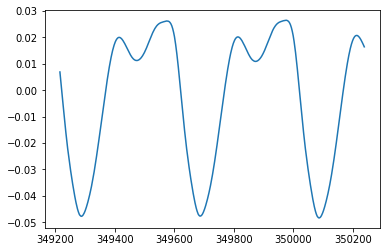

In [123]:
# Instantiate class and output a sample audio file and corresponding f0
freq_test = FrequencyValueDataset(root_dir='data/MDB-stem-synth/')
output = freq_test.__getitem__(11) # get_item takes idx value which corresponds to a file



In [ ]:
# Transform/rescale part to get the raw audio in terms of a single frame (?)
